In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
classes = pd.read_csv('C:/Users/etudiant/Downloads/spike_classes.csv')
time = pd.read_csv('C:/Users/etudiant/Downloads/spike_times.csv')

In [2]:
i = [round(float(f)) for f in classes.columns]
classes = pd.DataFrame(np.asarray(i).transpose())
classes.columns = ['class']
classes.head()

,class
0,4
1,4
2,4
3,2
4,4


In [3]:
time = pd.DataFrame(np.asarray(time.columns).transpose())
time.columns = ['time']
time['class'] = classes['class'].values
time.head()

,time,class
0,10320,4
1,24753,4
2,36050,4
3,42119,2
4,43124,4


In [4]:
raw = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f1.xlsx')
raw2 = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f2.xlsx')
raw3 = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f3.xlsx')
raw4 = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f4.xlsx')
raw5 = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f5.xlsx')
raw6 = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f6.xlsx')
raw7 = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f7.xlsx')
raw8 = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f8.xlsx')
raw9 = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f9.xlsx')
raw10 = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f10.xlsx')
raw11 = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f11.xlsx')
raw12 = pd.read_excel('C:/Users/etudiant/Downloads/spike_data/labeld_data/f12.xlsx')

In [5]:
raw['class'] = 0
raw2['class'] = 0
raw3['class'] = 0
raw4['class'] = 0
raw5['class'] = 0
raw6['class'] = 0
raw7['class'] = 0
raw8['class'] = 0
raw9['class'] = 0
raw10['class'] = 0
raw11['class'] = 0
raw12['class'] = 0

In [6]:
r = pd.concat([raw,raw2,raw3,raw4,raw5,raw6,raw7,raw8,raw9,raw10,raw11,raw12], ignore_index=True)

In [7]:
for i in time.index:
    j = time.loc[i]['time']
    if([char for char in j].count('.') >= 2):
        j = j.rsplit('.',1)[0]
    r.loc[float(j),'class'] = time.loc[i]['class']

In [12]:
print(r.loc[43124,'class'])

4


In [13]:
r['class'].unique()

array([0, 4, 2, 3, 5, 1, 6], dtype=int64)

In [14]:
r.loc[r['class'] == 6 ].head()

,A,class
815230,62.626376,6
899640,-17.042466,6
966340,30.946391,6
968070,-85.360690,6
1035200,11.138852,6


In [16]:
#CNN

In [24]:
from keras.models import Sequential
from keras.layers import Dense

#Load Data
x = r['A']
y = r['class']

X, Y, y_train, y_test = train_test_split(x, y, test_size = 0.10)

#define keras model
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#compile keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# fit the keras model on the dataset
history = model.fit(X, y_train, validation_split=0.33,epochs=20, batch_size=30000)


Train on 6708179 samples, validate on 3304029 samples
Epoch 1/20
6708179/6708179 [==============================] - 5s 1us/step - loss: 2.5335 - accuracy: 0.5597 - val_loss: 0.1221 - val_accuracy: 0.9999
Epoch 2/20
6708179/6708179 [==============================] - 4s 1us/step - loss: 0.0851 - accuracy: 0.9999 - val_loss: 0.0630 - val_accuracy: 0.9999
Epoch 3/20
6708179/6708179 [==============================] - 4s 1us/step - loss: 0.0518 - accuracy: 0.9999 - val_loss: 0.0430 - val_accuracy: 0.9999
Epoch 4/20
6708179/6708179 [==============================] - 4s 1us/step - loss: 0.0371 - accuracy: 0.9999 - val_loss: 0.0321 - val_accuracy: 0.9999
Epoch 5/20
6708179/6708179 [==============================] - 4s 1us/step - loss: 0.0284 - accuracy: 0.9999 - val_loss: 0.0253 - val_accuracy: 0.9999
Epoch 6/20
6708179/6708179 [==============================] - 5s 1us/step - loss: 0.0229 - accuracy: 0.9999 - val_loss: 0.0207 - val_accuracy: 0.9999
Epoch 7/20
6708179/6708179 [==================

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


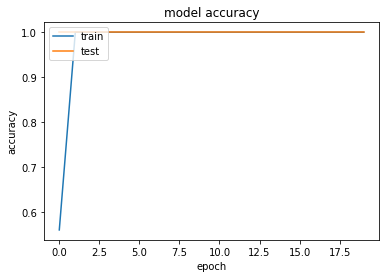

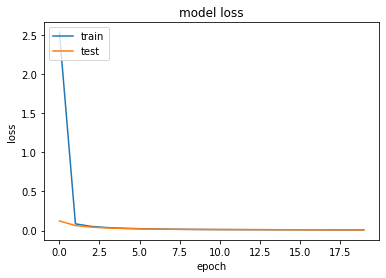

In [25]:
from matplotlib import pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y_train)
print('Accuracy: %.2f' % (accuracy*100))
# make probability predictions with the model
predictions = model.predict(Y)
# round predictions 
rounded = [round(x[0]) for x in predictions]

# make class predictions with the model
predictions = model.predict_classes(Y)


10012208/10012208 [==============================] - 85s 8us/step
Accuracy: 99.99


In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9998777492925639
